# 데이터 분석

## t - test

In [5]:
# 통계 검정에 필요한 패키지 다운
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
#필요한 패키지 임포트
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
data = pd.read_excel('data_research.xlsx')
data.head()

,case,sex,army,age,grade,couple,live,eat,entertainment,fashion/shopping,...,10_6,10_7,10_8,10_9,10_10,10_11,11,12,13,14
0,1,2,2,20,3,2,2,10.0,5.0,20.0,...,0,1,0.0,0,1,0,3,3,5,4
1,2,2,3,23,3,2,1,15.0,0.0,10.0,...,1,0,0.0,0,0,0,6,5,4,9
2,3,1,1,21,2,2,1,20.0,10.0,10.0,...,0,0,0.0,0,0,0,3,5,8,3
3,4,2,3,20,2,2,2,10.0,0.0,2.0,...,0,0,0.0,0,0,1,8,7,2,2
4,5,1,1,25,4,2,1,20.0,10.0,0.0,...,0,0,0.0,0,0,1,7,6,4,5


In [3]:
# 남여 한글로 바꾸기

data.loc[data['sex'] == 1,'sex'] = '남자'
data.loc[data['sex'] == 2,'sex'] = '여자'

data.head()

,case,sex,army,age,grade,couple,live,eat,entertainment,fashion/shopping,...,10_6,10_7,10_8,10_9,10_10,10_11,11,12,13,14
0,1,여자,2,20,3,2,2,10.0,5.0,20.0,...,0,1,0.0,0,1,0,3,3,5,4
1,2,여자,3,23,3,2,1,15.0,0.0,10.0,...,1,0,0.0,0,0,0,6,5,4,9
2,3,남자,1,21,2,2,1,20.0,10.0,10.0,...,0,0,0.0,0,0,0,3,5,8,3
3,4,여자,3,20,2,2,2,10.0,0.0,2.0,...,0,0,0.0,0,0,1,8,7,2,2
4,5,남자,1,25,4,2,1,20.0,10.0,0.0,...,0,0,0.0,0,0,1,7,6,4,5


In [4]:
# 일표본 t 검정
# 평균이 내가 생각한 값이라고 할 수 있는지
result = stats.ttest_1samp(data['eat'], 15)
print(result)
print('t : {:.3f} \np-value : {:.17f}'.format(result[0], result[1]))

Ttest_1sampResult(statistic=8.7835045343761, pvalue=3.653985656242255e-17)
t : 8.784 
p-value : 0.00000000000000004


In [5]:
# 독립표본 t 검정
# 두 집간의 평균의 차이가 있는지

# 등분산 검정

result = stats.levene(data.loc[data['sex'] == '남자', 'eat'],
                     data.loc[data['sex'] == '여자', 'eat'])
print(result)

LeveneResult(statistic=0.16574068599870195, pvalue=0.6841255249275369)


In [6]:
# 독립표폰 t 검정

# 식비 비교
result = stats.ttest_ind(data.loc[data['sex'] == '남자', 'eat'],
                     data.loc[data['sex'] == '여자', 'eat'],
                         equal_var=True)
print(result)

Ttest_indResult(statistic=1.5330534041687252, pvalue=0.12598963041683306)


In [7]:
# 패션/쇼핑 비교
result = stats.levene(data.loc[data['sex'] == '남자', 'fashion/shopping'],
                     data.loc[data['sex'] == '여자', 'fashion/shopping'])
print(result)



result = stats.ttest_ind(data.loc[data['sex'] == '남자', 'fashion/shopping'],
                     data.loc[data['sex'] == '여자', 'fashion/shopping'],
                         equal_var=False)
print(result)

LeveneResult(statistic=0.34156596215821233, pvalue=0.5592296823462897)
Ttest_indResult(statistic=-3.714609382613695, pvalue=0.00023021209481849391)


In [8]:
# 아노바 검정 ( 분산 분석 )

In [9]:
data.value_counts('age')

age
19    141
20    115
21     54
23     41
22     31
24     24
18     16
25     11
26      2
28      2
dtype: int64

In [13]:
# 만 19,20,21살을 대상으로 비교
group19 = data[data['age'] == 19]
group20 = data[data['age'] == 20]
group21 = data[data['age'] == 21]

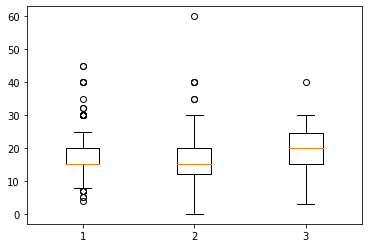

In [20]:
plt.boxplot([group19['eat'], group20['eat'], group21['eat']])
plt.show()

In [ ]:
# h0 : 나이별 식비의 차이는 없을 것이다.
# h1 : 나이별 식비의 차이가 있을 것이다.

In [21]:
# 일원 분산 분석
result = stats.f_oneway(group19['eat'], group20['eat'], group21['eat'])
print(result)

F_onewayResult(statistic=1.2073494089591137, pvalue=0.30040432057699173)


In [31]:
# 토탈 소비금액으로 비교

# 일원 분산 분석
result = stats.f_oneway(group19['total'], group20['total'], group21['total'])
print(result)

F_onewayResult(statistic=4.414800080310521, pvalue=0.012874523203138928)


### 19살 20살 21살의 식비는 같으나 총 소비금액은 다르다고 할 수 있다.

## 카이제곱 테스트


In [34]:
data.columns

Index([             'case',               'sex',              'army',
                     'age',             'grade',            'couple',
                    'live',               'eat',     'entertainment',
        'fashion/shopping',           'culture',            'beauty',
                     'edu',           'healthy',              'life',
                  'saving',             'total',              'eat2',
          'entertainment2', 'fashion/shopping2',          'culture2',
                 'beauty2',              'edu2',          'healthy2',
                   'life2',           'saving2',            'total2',
                         9,              '10_1',              '10_2',
                    '10_3',              '10_4',              '10_5',
                    '10_6',              '10_7',              '10_8',
                    '10_9',             '10_10',             '10_11',
                        11,                  12,                  13,
                    

### 남여에 따라 커플, 솔로가 차이가 있는지 카이제곱 검정으로 알아보자 

In [36]:
# 커플 한글로 바꾸기

data.loc[data['couple'] == 1,'couple'] = '커플'
data.loc[data['couple'] == 2,'couple'] = '솔로'



# 카이제곱 분석을 위한 교차표 만들기

table = pd.crosstab(data['sex'],data['couple'])
table

couple,솔로,커플
sex,,
남자,168,40
여자,156,73


In [37]:
result = stats.chi2_contingency(table)
print(result)

(8.445753945909178, 0.003658967148629325, 1, array([[154.21510297,  53.78489703],
       [169.78489703,  59.21510297]]))


In [43]:
# 문자 앞에 f를 붙이면 중괄호안에 변수 넣기 가능 f-string
print(f'카이 스퀘어 값 : {result[0]}',
      f"p-value (0.05): {result[1]}",
      f"자유도 수: {result[2]}",
      f"기대값: \n{pd.DataFrame(result[3])}",
      f"측정값: \n{table}", sep = "\n")

카이 스퀘어 값 : 8.445753945909178
p-value (0.05): 0.003658967148629325
자유도 수: 1
기대값: 
            0          1
0  154.215103  53.784897
1  169.784897  59.215103
측정값: 
couple   솔로  커플
sex            
남자      168  40
여자      156  73


In [45]:
# 시각화

plt.barplot(table)

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

In [52]:
chi_data = table.melt(ignore_index=False)

In [53]:
chi_data

,couple,value
sex,,
남자,솔로,168
여자,솔로,156
남자,커플,40
여자,커플,73


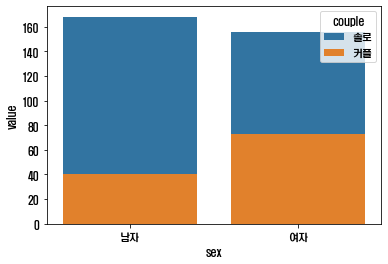

In [64]:
import matplotlib

font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/H2HDRM.TTF').get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False  # matplotlib 에 한국어 폰트 적용


sns.barplot(x = chi_data.index , y='value', hue='couple', data=chi_data,
           dodge=False)
plt.show()

In [ ]:
## 회귀분석